In [1]:
import gdown
!gdown --id 1-0OQTzDJmEu4ndbXari5K4X5rVPleCyA

Downloading...
From: https://drive.google.com/uc?id=1-0OQTzDJmEu4ndbXari5K4X5rVPleCyA
To: /content/images_color.csv
517MB [00:05, 96.7MB/s]


In [2]:
!gdown --id 1rQttSf0csdtAYQoP0k0uF4eQ3s5EXyGg

Downloading...
From: https://drive.google.com/uc?id=1rQttSf0csdtAYQoP0k0uF4eQ3s5EXyGg
To: /content/test_set_in_csv.csv
127MB [00:03, 40.8MB/s]


In [3]:
!gdown --id 1SOx9SycLRENaaFT2sBFh9N_7KfA6PiS1

Downloading...
From: https://drive.google.com/uc?id=1SOx9SycLRENaaFT2sBFh9N_7KfA6PiS1
To: /content/images_belgium.csv
47.7MB [00:01, 42.6MB/s]


In [4]:
!gdown --id 1yi-dS3qaDvsG1UmLaRRw-dBwJl1vg4SY

Downloading...
From: https://drive.google.com/uc?id=1yi-dS3qaDvsG1UmLaRRw-dBwJl1vg4SY
To: /content/images_belgium_test.csv
26.8MB [00:02, 11.3MB/s]


In [5]:
import csv
import random
import math
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# paths
training_path = '/content/images_color.csv'
extra_train = '/content/images_belgium.csv'
test_path = '/content/test_set_in_csv.csv'
extra_test = '/content/images_belgium_test.csv'

extra_to_orignal = {"1":43, "8":44, "24":45, "38":46, "47":47}        # extra added images class ids and their new ids

# Data Loading functions

In [7]:
def load_training_data():
  ydata = []
  xdata = []

  with open(training_path, 'r') as f:
    reader = csv.reader(f)
    for row in reader:
      if row[0]!='':
        label = row[0]
        image = np.array([int(a) for a in row[1:]], dtype = "uint8")
        image = image.reshape((32, 32, 3))
        image = cv2.resize(image,(64, 64))
        xdata.append(image)
        ydata.append(label)

  with open('/content/images_belgium.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
      if len(row)!=0 and row[0] in extra_to_orignal.keys():
        label = extra_to_orignal[row[0]]
        image = np.array([int(a) for a in row[1:]], dtype = "uint8")
        image = image.reshape((32, 32, 3))
        image = cv2.resize(image,(64, 64))
        xdata.append(image)
        ydata.append(label)

  X_data = np.array(xdata)
  Y_data = np.array(ydata).astype("int")

  c = np.arange(X_data.shape[0])
  np.random.shuffle(c)

  return X_data[c], Y_data[c]

In [8]:
def load_testing_data():
  ydata = []
  xdata = []

  with open(test_path, 'r') as f:
    reader = csv.reader(f)
    for row in reader:
      if len(row)!=0:
        label = row[0]
        image = np.array([int(a) for a in row[1:]], dtype = "uint8")
        image = image.reshape((32, 32, 3))
        image = cv2.resize(image,(64, 64))
        xdata.append(image)
        ydata.append(label)

  with open('/content/images_belgium_test.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
      if len(row)!=0 and row[0] in extra_to_orignal.keys():
        label = extra_to_orignal[row[0]]
        image = np.array([int(a) for a in row[1:]], dtype = "uint8")
        try:
          image = image.reshape((32, 32, 3))
          image = cv2.resize(image,(64, 64))
        except:
          image = image.reshape((64, 64, 3))
        xdata.append(image)
        ydata.append(label)

  X_data = np.array(xdata)
  Y_data = np.array(ydata).astype("int")

  c = np.arange(X_data.shape[0])
  np.random.shuffle(c)

  return X_data[c], Y_data[c]

In [9]:
X, Y = load_training_data()               # loading data

# Plot and Display functions

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


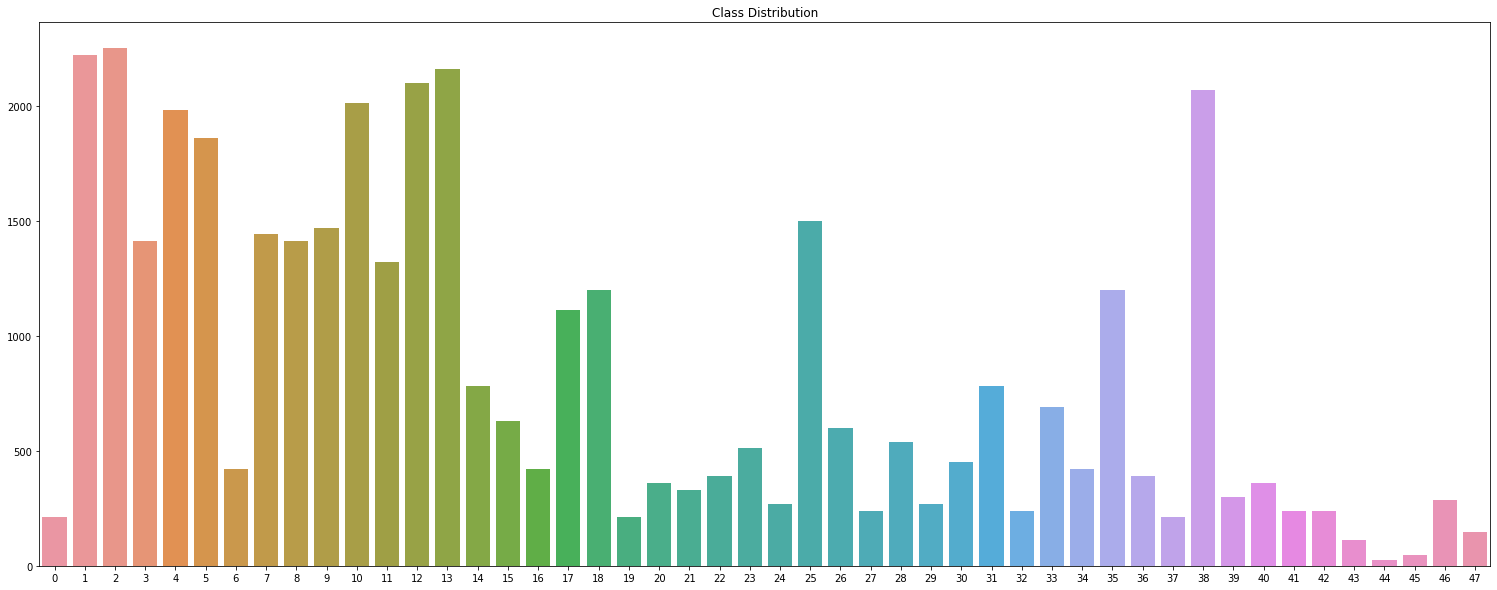

In [10]:
def plot(y):
  category_names = [n for n in range(len(np.unique(y)))]
  label_num = []
  for i in category_names:
    num = sum(y == i)
    label_num.append(num)
  plt.figure(figsize=(26,10))
  sns.barplot(category_names, label_num).set_title("Class Distribution")
  plt.show()

def display_one_sign(image, title, subplot, red=False, titlesize=16):
    plt.subplot(*subplot)
    plt.axis('off')
    plt.imshow(image,  cmap='Greys_r')
    if title != None:
        plt.title(title, fontsize=int(titlesize) if not red else int(titlesize/1.2),
                  color='red' if red else 'black', fontdict={'verticalalignment':'center'}, pad=int(titlesize/1.5))
    return (subplot[0], subplot[1], subplot[2]+1)

def display_batch_of_images(images, labels = None):         # Two parameters 1) batch of images, 2) corresponding labels(optional)
  cols = 15
  rows = 1+(images.shape[0]//20)

  if labels is None:
    labels = [None for _ in enumerate(images)]

  FIGSIZE = 26.0
  SPACING = 0.1
  subplot=(rows,cols,1)
  if rows < cols:
    plt.figure(figsize=(FIGSIZE,FIGSIZE/cols*rows))
  else:
    plt.figure(figsize=(FIGSIZE/rows*cols,FIGSIZE))
  
  for i, (image, label) in enumerate(zip(images[:rows*cols], labels[:rows*cols])):
    title = label
    correct = True
    dynamic_titlesize = FIGSIZE*SPACING/max(rows,cols)*40+3
    subplot = display_one_sign(image, title, subplot, not correct, titlesize=dynamic_titlesize)

  plt.show()

plot(Y)

# Preprocessing Function

In [11]:
def adjust_gamma(image, gamma=2.0):
  invGamma = 1.0 / gamma
  table = np.array([((i / 255.0)**invGamma)*255 for i in np.arange(0, 256)]).astype("uint8")
  return cv2.LUT(image, table)

def preprocessing(X_data):                                           # Batch of images in numpy format as input
  xdata = []
  for image in X_data:
    image = adjust_gamma(image)                                      # Increase visibility(colored)
    image = cv2.fastNlMeansDenoisingColored(image,None,10,10,7,21)   # remove noise + smoothing(colored)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)                  # converting to single channel
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))       # CLAHE
    image = clahe.apply(image)                                       # appling CLAHE
    image = cv2.adaptiveThreshold(image,255,
                                  cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                  cv2.THRESH_BINARY,11,2)            # Binary Filter
    image = cv2.Laplacian(image,cv2.CV_64F)                          # laplacian edge filter
    xdata.append(image)
  return np.array(xdata)

# Note - 1) Use anyone from adjust_gamma or denoise(both results in decrease of quality)
#        2) If using singlechannel don't use colored preprocessing

# Some Preprocessing Visualizations

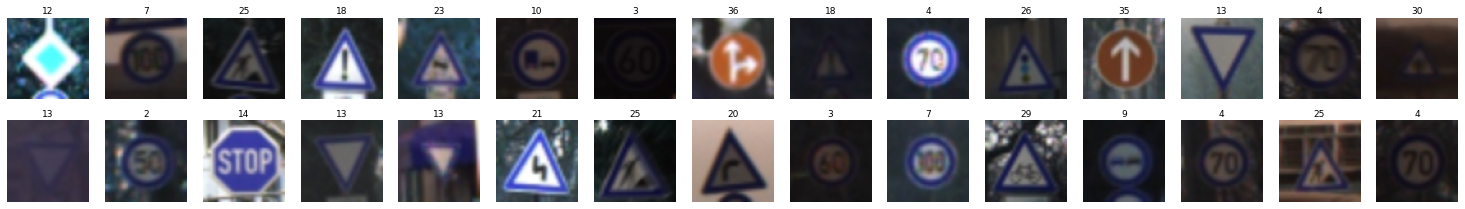

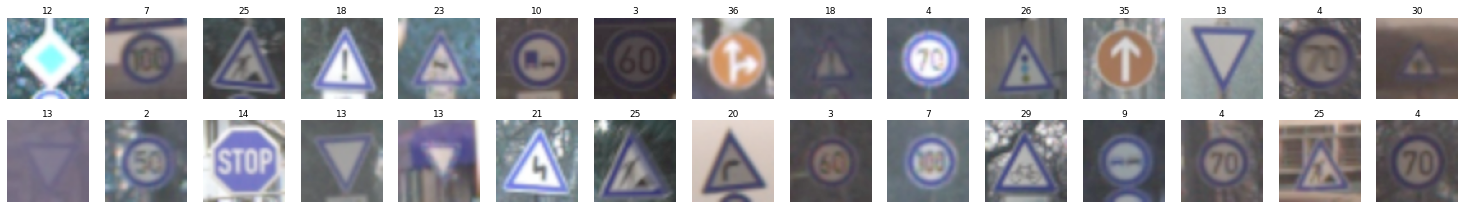

In [12]:
# adjust gamma
def preprocessing(X_data):
  xdata = []
  for image in X_data:
    image = adjust_gamma(image)                                        # Increase visibility(colored)
    # image = cv2.fastNlMeansDenoisingColored(image,None,10,10,7,21)     # remove noise + smoothing(colored)
    # image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)                    # converting to single channel
    # clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))         # CLAHE
    # image = clahe.apply(image)                                         # appling CLAHE
    # image = cv2.adaptiveThreshold(image,255,
    #                               cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    #                               cv2.THRESH_BINARY,11,2)              # Binary Filter
    # image = cv2.Laplacian(image,cv2.CV_64F)                            # laplacian edge filter
    xdata.append(image)
  return np.array(xdata)
X_new = preprocessing(X[:30])
display_batch_of_images(X[:30], Y[:30])
display_batch_of_images(X_new[:30], Y[:30])

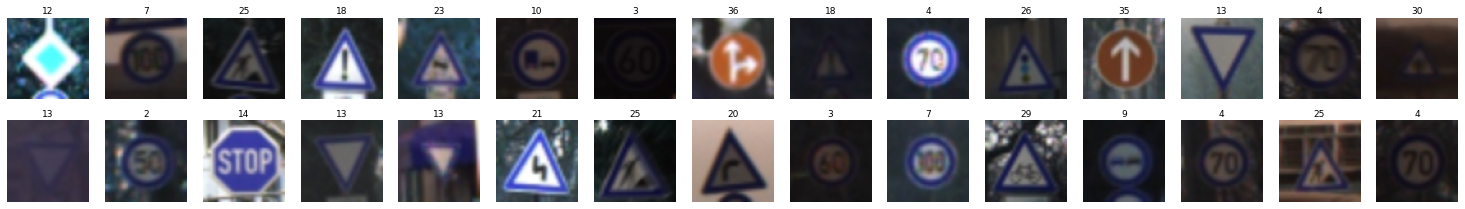

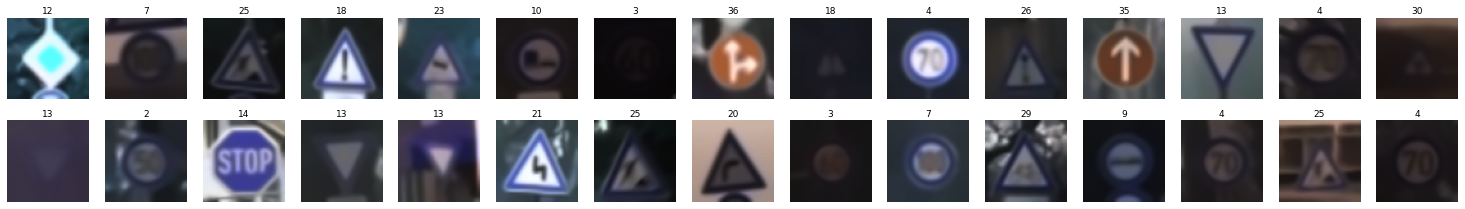

In [13]:
# denoise
def preprocessing(X_data):
  xdata = []
  for image in X_data:
    # image = adjust_gamma(image)                                        # Increase visibility(colored)
    image = cv2.fastNlMeansDenoisingColored(image,None,10,10,7,21)     # remove noise + smoothing(colored)
    # image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)                    # converting to single channel
    # clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))         # CLAHE
    # image = clahe.apply(image)                                         # appling CLAHE
    # image = cv2.adaptiveThreshold(image,255,
    #                               cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    #                               cv2.THRESH_BINARY,11,2)              # Binary Filter
    # image = cv2.Laplacian(image,cv2.CV_64F)                            # laplacian edge filter
    xdata.append(image)
  return np.array(xdata)
X_new = preprocessing(X[:30])
display_batch_of_images(X[:30], Y[:30])
display_batch_of_images(X_new[:30], Y[:30])

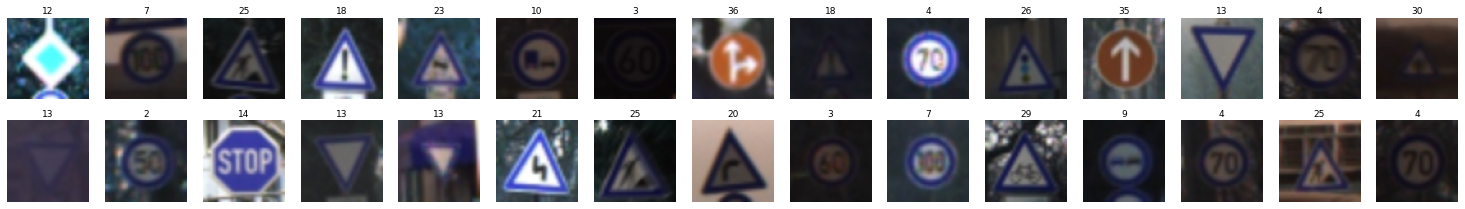

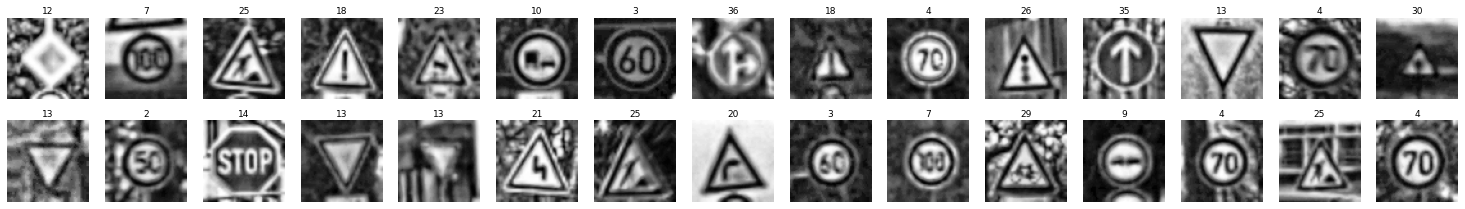

In [14]:
# CLAHE
def preprocessing(X_data):
  xdata = []
  for image in X_data:
    # image = adjust_gamma(image)                                        # Increase visibility(colored)
    # image = cv2.fastNlMeansDenoisingColored(image,None,10,10,7,21)     # remove noise + smoothing(colored)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)                    # converting to single channel
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))         # CLAHE
    image = clahe.apply(image)                                         # appling CLAHE
    # image = cv2.adaptiveThreshold(image,255,
    #                               cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    #                               cv2.THRESH_BINARY,11,2)              # Binary Filter
    # image = cv2.Laplacian(image,cv2.CV_64F)                            # laplacian edge filter
    xdata.append(image)
  return np.array(xdata)
X_new = preprocessing(X[:30])
display_batch_of_images(X[:30], Y[:30])
display_batch_of_images(X_new[:30], Y[:30])

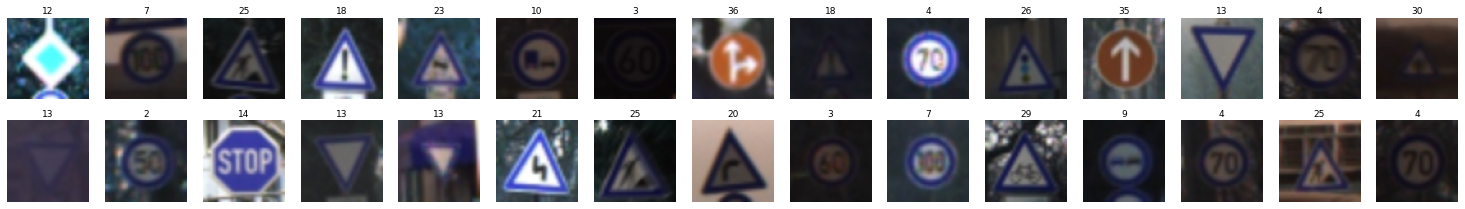

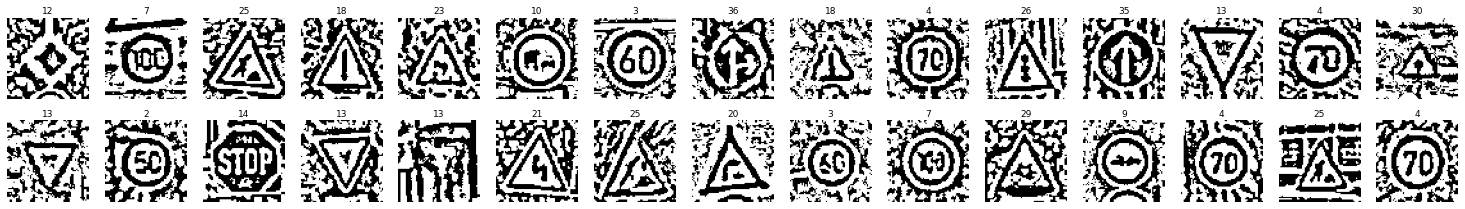

In [15]:
# CLAHE, Binary filter
def preprocessing(X_data):
  xdata = []
  for image in X_data:
    # image = adjust_gamma(image)                                        # Increase visibility(colored)
    # image = cv2.fastNlMeansDenoisingColored(image,None,10,10,7,21)     # remove noise + smoothing(colored)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)                    # converting to single channel
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))         # CLAHE
    image = clahe.apply(image)                                         # appling CLAHE
    image = cv2.adaptiveThreshold(image,255,
                                  cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                  cv2.THRESH_BINARY,11,2)              # Binary Filter
    # image = cv2.Laplacian(image,cv2.CV_64F)                            # laplacian edge filter
    xdata.append(image)
  return np.array(xdata)
X_new = preprocessing(X[:30])
display_batch_of_images(X[:30], Y[:30])
display_batch_of_images(X_new[:30], Y[:30])

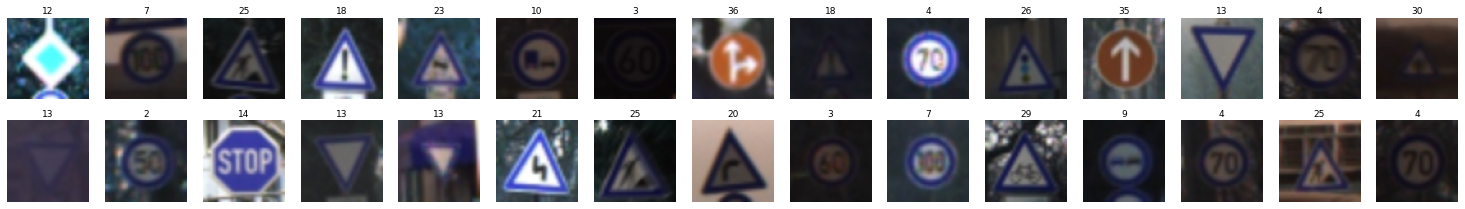

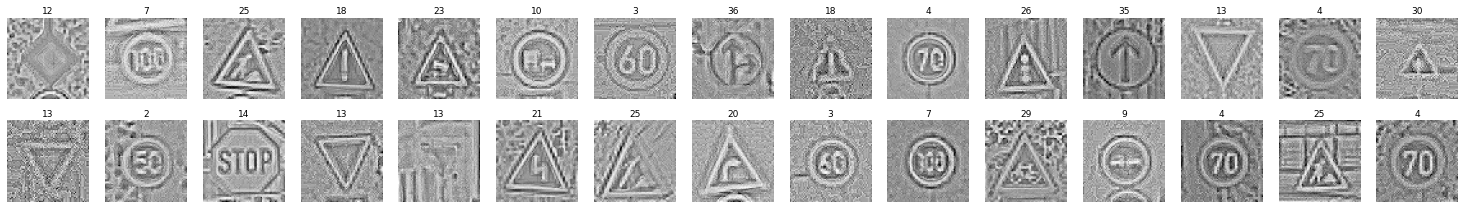

In [16]:
# CLAHE, Edge filter
def preprocessing(X_data):
  xdata = []
  for image in X_data:
    # image = adjust_gamma(image)                                        # Increase visibility(colored)
    # image = cv2.fastNlMeansDenoisingColored(image,None,10,10,7,21)     # remove noise + smoothing(colored)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)                    # converting to single channel
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))         # CLAHE
    image = clahe.apply(image)                                         # appling CLAHE
    # image = cv2.adaptiveThreshold(image,255,
    #                               cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    #                               cv2.THRESH_BINARY,11,2)              # Binary Filter
    image = cv2.Laplacian(image,cv2.CV_64F)                            # laplacian edge filter
    xdata.append(image)
  return np.array(xdata)
X_new = preprocessing(X[:30])
display_batch_of_images(X[:30], Y[:30])
display_batch_of_images(X_new[:30], Y[:30])

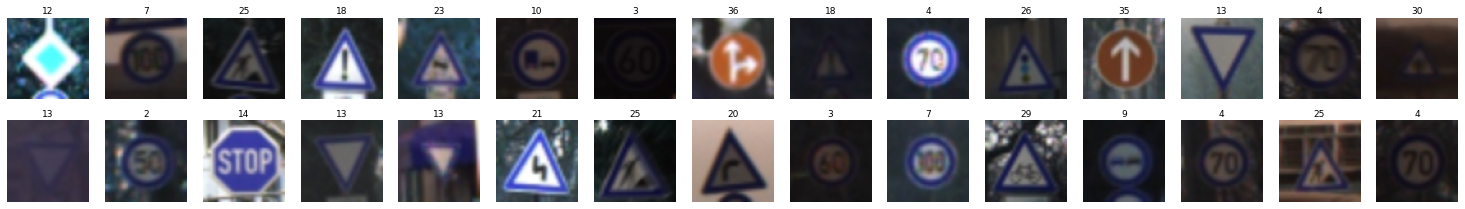

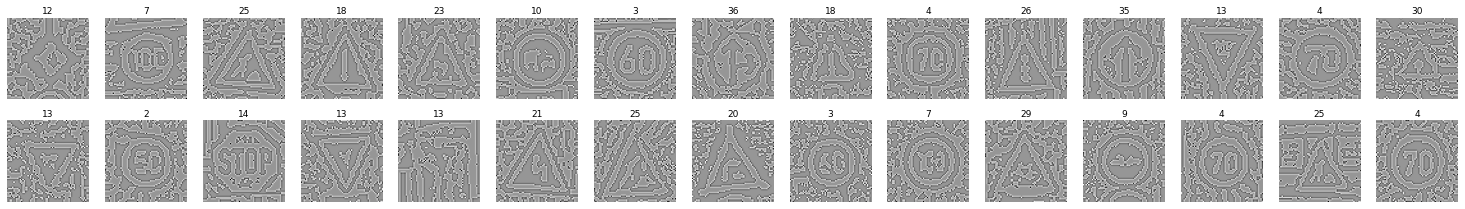

In [17]:
# CLAHE, Binary Filter, Edge filter
def preprocessing(X_data):
  xdata = []
  for image in X_data:
    # image = adjust_gamma(image)                                        # Increase visibility(colored)
    # image = cv2.fastNlMeansDenoisingColored(image,None,10,10,7,21)     # remove noise + smoothing(colored)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)                    # converting to single channel
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))         # CLAHE
    image = clahe.apply(image)                                         # appling CLAHE
    image = cv2.adaptiveThreshold(image,255,
                                  cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                  cv2.THRESH_BINARY,11,2)              # Binary Filter
    image = cv2.Laplacian(image,cv2.CV_64F)                            # laplacian edge filter
    xdata.append(image)
  return np.array(xdata)
X_new = preprocessing(X[:30])
display_batch_of_images(X[:30], Y[:30])
display_batch_of_images(X_new[:30], Y[:30])